<a href="https://colab.research.google.com/github/dutt2022/Coursera-Data-science-Projects/blob/main/b1_Copy_of_Concrete_Data_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
concrete_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Intro-to-KERAS/concrete_data.csv', encoding='ISO-8859-1')

In [ ]:
#sns.pairplot(concrete_df)

In [ ]:
concrete_df.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [ ]:

X = concrete_df.drop(['Strength'], axis = 1)


In [ ]:
Y=concrete_df['Strength']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=42)

In [ ]:

input_shape=X_train.shape[1]

In [ ]:
X_train.shape

(721, 8)

In [ ]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense,Dropout
from sklearn.preprocessing import MinMaxScaler
def regression_model():
  model = Sequential()
  model.add(Dense(10,  activation='relu',input_dim=8,input_shape=(X_train.shape[1],)))

  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(optimizer='adam', loss='mean_squared_error',metrics='mse')
  return model
  model.summary()


In [ ]:
model = regression_model()

. Train the model on the training data using 50 epochs.

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=50,  verbose=2, validation_split=0.3)

Epoch 1/50
16/16 - 1s - loss: 541.2715 - mse: 541.2715 - val_loss: 222.0726 - val_mse: 222.0726 - 1s/epoch - 68ms/step
Epoch 2/50
16/16 - 0s - loss: 309.2302 - mse: 309.2302 - val_loss: 245.8501 - val_mse: 245.8501 - 56ms/epoch - 4ms/step
Epoch 3/50
16/16 - 0s - loss: 290.5544 - mse: 290.5544 - val_loss: 214.8555 - val_mse: 214.8555 - 54ms/epoch - 3ms/step
Epoch 4/50
16/16 - 0s - loss: 287.2731 - mse: 287.2731 - val_loss: 211.8376 - val_mse: 211.8376 - 55ms/epoch - 3ms/step
Epoch 5/50
16/16 - 0s - loss: 277.6354 - mse: 277.6354 - val_loss: 210.3020 - val_mse: 210.3020 - 74ms/epoch - 5ms/step
Epoch 6/50
16/16 - 0s - loss: 271.7360 - mse: 271.7360 - val_loss: 205.0127 - val_mse: 205.0127 - 67ms/epoch - 4ms/step
Epoch 7/50
16/16 - 0s - loss: 267.8470 - mse: 267.8470 - val_loss: 202.0646 - val_mse: 202.0646 - 59ms/epoch - 4ms/step
Epoch 8/50
16/16 - 0s - loss: 262.0122 - mse: 262.0122 - val_loss: 198.9351 - val_mse: 198.9351 - 70ms/epoch - 4ms/step
Epoch 9/50
16/16 - 0s - loss: 255.1710 - 

In [ ]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


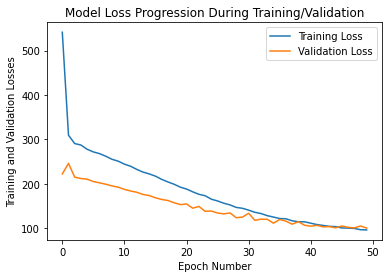

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

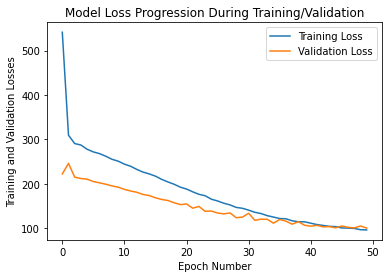

In [ ]:
plt.plot(epochs_hist.history['mse'])
plt.plot(epochs_hist.history['val_mse'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from keras.losses import mean_squared_error

In [ ]:
result = np.sqrt(mean_squared_error(y_test,y_pred))
result

array([18.26233 , 21.456985, 28.46942 , 20.947687, 26.0417  , 19.590385,
       16.693722, 19.488932, 18.711027, 17.370857, 17.635841, 23.875515,
       31.479826, 23.314718, 18.147394, 18.237455, 18.11512 , 17.277908,
       17.925753, 17.25881 , 16.574017, 16.455282, 17.938423, 18.607067,
       17.72219 , 16.893793, 30.720337, 17.249464, 19.177872, 18.843191,
       16.525776, 16.747168, 24.341167, 18.564009, 18.03711 , 18.012869,
       18.946579, 18.191116, 21.461657, 17.65288 , 23.044847, 24.409616,
       16.777952, 22.594162, 21.112026, 30.226011, 24.512157, 16.61391 ,
       18.441748, 21.945162, 20.34784 , 18.951239, 16.500868, 17.218405,
       24.258224, 22.033836, 20.211163, 28.3317  , 17.887743, 24.958647,
       18.11502 , 17.995386, 17.630651, 22.913698, 17.983343, 20.433067,
       16.93967 , 22.95294 , 16.468899, 18.345356, 20.72702 , 20.034046,
       24.855715, 17.64469 , 17.085447, 21.105808, 17.787155, 19.895947,
       27.651556, 22.814194, 25.215805, 20.998281, 

In [ ]:
from keras.losses import mean_squared_error

Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors

In [ ]:
MSE_List = []
for i in range(50):
    #1-Split Data:
     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
     model = regression_model()
    #2-Train:
     model.fit(X_train, y_train, epochs=50, verbose=0)
    
    #Prediction:
     y_pred = model.predict(X_test)
    # y_pred = np.argmax(model.predict(X_test),axis=-1)
    # y_test=np.argmax(y_test)
    #3-Evaluate_Model:
     result = np.sqrt(mean_squared_error(y_test,y_pred))
    
     print("{}: sqrt(mse) = {}". format(i+1,result))
     MSE_List.append(result)
     print("***_________________________________***\n\n\n")

1: sqrt(mse) = [19.808035 22.503862 34.85412  21.710587 27.602755 17.101267 20.409117
 23.222193 18.652454 19.44854  18.894278 24.743166 29.056719 21.836693
 20.317068 16.454844 16.855228 19.420635 16.549149 19.136612 16.77283
 17.150381 17.06183  22.710062 17.560984 16.9823   30.100449 18.615616
 19.707941 24.374863 16.570578 17.385565 19.972994 21.480732 20.909395
 16.451458 18.869041 16.885685 26.87708  18.66111  24.221874 31.54849
 17.808186 20.924671 25.610428 34.234783 22.860466 20.414846 23.382586
 27.52071  18.212233 21.324    18.921852 18.060259 21.501143 21.813963
 20.604435 27.704214 16.616428 23.58705  16.843918 26.044432 17.450607
 23.534372 19.858145 22.519562 16.777946 26.038794 17.888287 20.342396
 29.89971  23.201073 32.635456 18.920265 19.303295 26.562277 19.163923
 23.444544 30.282473 24.974585 22.087435 17.376284 16.743595 16.996094
 21.97169  21.710587 17.341045 16.500124 21.3102   23.201712 18.326458
 36.38688  24.206514 18.855576 17.367302 20.554228 19.93533  18.

A. Results
Report mean square MSE and std square MSE

In [ ]:
# Calculate the mean and the standard deviation of the metric on the 50 samplings
mean_sqmse_A = np.mean(MSE_List)
std_sqmse_A  = np.std(MSE_List)

# Generate a data frame to store the results of the differents parts of this project
df_results = pd.DataFrame.from_dict({"Part": ["A"],"mean_sq_mse": [mean_sqmse_A], "std_sq_mse": [std_sqmse_A]})
df_results

,Part,mean_sq_mse,std_sq_mse
0,A,20.036343,4.121596


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

PART-B  -NORMALIZE THE DATA(EPOCHS=50)

In [ ]:
X = concrete_df.drop(['Strength'], axis = 1)

In [ ]:
Y=concrete_df['Strength']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()

In [ ]:
X=scaler.fit_transform(X)

In [ ]:
import tensorflow.keras
from tensorflow.keras.utils import to_categorical
#X=to_categorical(X)
y=to_categorical(Y)
y = scaler.fit_transform(y)
#y_scaled = scaler.transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=42)

In [ ]:
model = regression_model()

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=50,  verbose=2, validation_split=0.3)

Epoch 1/50
16/16 - 1s - loss: 0.0134 - mse: 0.0134 - val_loss: 0.0123 - val_mse: 0.0123 - 802ms/epoch - 50ms/step
Epoch 2/50
16/16 - 0s - loss: 0.0123 - mse: 0.0123 - val_loss: 0.0121 - val_mse: 0.0121 - 56ms/epoch - 4ms/step
Epoch 3/50
16/16 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0120 - val_mse: 0.0120 - 60ms/epoch - 4ms/step
Epoch 4/50
16/16 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0120 - val_mse: 0.0120 - 62ms/epoch - 4ms/step
Epoch 5/50
16/16 - 0s - loss: 0.0120 - mse: 0.0120 - val_loss: 0.0120 - val_mse: 0.0120 - 66ms/epoch - 4ms/step
Epoch 6/50
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 57ms/epoch - 4ms/step
Epoch 7/50
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 58ms/epoch - 4ms/step
Epoch 8/50
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 60ms/epoch - 4ms/step
Epoch 9/50
16/16 - 0s - loss: 0.0119 - mse: 0.0119 - val_loss: 0.0119 - val_mse: 0.0119 - 71ms/epoch -

 create a list of 50 mean squared errors.

In [ ]:
MSE_List = []
for i in range(50):
    #1-Split Data:
     X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
     model = regression_model()
    #2-Train:
     model.fit(X_train, y_train, epochs=50, verbose=0)
    
    #Prediction:
     y_pred = model.predict(X_test)
    # y_pred = np.argmax(model.predict(X_test),axis=-1)
    # y_test=np.argmax(y_test)
    #3-Evaluate_Model:
     result = np.sqrt(mean_squared_error(y_test,y_pred))
    
     print("{}: sqrt(mse) = {}". format(i+1,result))
     MSE_List.append(result)
     print("***_________________________________***\n\n\n")

1: sqrt(mse) = [17.900269 16.755596 17.823187 16.732899 16.47836  16.46106  16.455969
 17.25318  16.603155 16.471642 16.451988 16.860653 18.380407 16.815445
 16.501514 16.449589 16.459269 16.609892 16.47329  16.588697 16.451664
 16.507553 16.691656 16.58753  16.485386 16.729311 16.584808 16.477291
 17.341906 16.892189 16.452871 16.676302 16.496653 17.402367 16.540287
 16.626093 16.544403 16.491444 16.741161 16.830305 16.575237 16.872608
 16.451048 17.17293  16.451204 16.99384  17.154974 17.799114 16.65154
 16.673613 16.454514 16.449217 16.463684 16.45693  16.506977 16.662642
 16.550749 16.621984 16.806183 16.533495 16.481848 17.512331 16.758604
 17.10633  16.596891 16.492836 16.449472 16.458326 16.48421  16.49645
 17.019863 16.67378  16.92741  16.452087 16.449636 16.452398 17.831835
 17.1952   16.569881 16.450012 17.319693 16.578407 16.502005 16.493607
 18.210331 16.732899 16.495253 16.455406 16.552097 16.459883 16.543926
 17.19767  16.49863  16.451742 16.453611 17.060556 16.535122 16.

Report the mean and the standard deviation of the mean squared errors

In [ ]:
mean_sqmse_B = np.mean(MSE_List)
std_sqmse_B  = np.std(MSE_List)

# Generate a data frame to store the results of the differents parts of this project
df_results = pd.DataFrame.from_dict({"Part": ["B"],"mean_sq_mse": [mean_sqmse_B], "std_sq_mse": [std_sqmse_B]})
df_results

,Part,mean_sq_mse,std_sq_mse
0,B,16.71431,0.421331


COMPARISON OF A ND B RESULTS

In [ ]:
Results = pd.DataFrame.from_dict({"Part": ["A","B"],
                                  "mean_sq_mse": [mean_sqmse_A, mean_sqmse_B], 
                                  "std_sq_mse": [std_sqmse_A, std_sqmse_B]})
Results

,Part,mean_sq_mse,std_sq_mse
0,A,20.036343,4.121596
1,B,16.714310,0.421331


In [ ]:
Results = pd.DataFrame.from_dict({"Part": ["EPOCHS-50","EPOCHS-50(Normalized)"],
                                  "mean_sq_mse": [mean_sqmse_A, mean_sqmse_B], 
                                  "std_sq_mse": [std_sqmse_A, std_sqmse_B]})
Results

,Part,mean_sq_mse,std_sq_mse
0,EPOCHS-50,20.036343,4.121596
1,EPOCHS-50(Normalized),16.714310,0.421331
